In [9]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import stats_can 

In [10]:
# Create a data frame using the raw data
main_df = pd.read_csv("raw\\application_data_cleaned_v1.csv")

In [11]:
# Check for null values
main_df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        8
AMT_GOODS_PRICE                  163
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                62316
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
ORGANIZATION_TYPE                  0
d

In [12]:
# Drop null values
main_df.dropna(axis=0,inplace=True)
#main_df["AMT_GOODS_PRICE"].dropna(axis=0,inplace=True)

In [13]:
# Display count of null values - should now be 0
main_df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
dtype: int64

In [14]:
# Split data into defaulters and non-defaulters
df_dfaulters = main_df[main_df['TARGET']==1]
df_normal = main_df[main_df['TARGET']==0]

In [15]:
df_dfaulters.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,...,1,1,0,1,1,0,Laborers,2,2,Business Entity Type 3
1,100031,1,Cash loans,F,N,Y,112500.0,979992.0,27076.5,702000.0,...,1,1,0,1,0,0,Cooking staff,3,2,Business Entity Type 3
2,100047,1,Cash loans,M,N,Y,202500.0,1193580.0,35028.0,855000.0,...,1,1,0,1,0,0,Laborers,2,2,Business Entity Type 3
3,100049,1,Cash loans,F,N,N,135000.0,288873.0,16258.5,238500.0,...,1,1,1,1,1,0,Sales staff,3,3,Self-employed
6,100130,1,Cash loans,F,N,Y,157500.0,723996.0,30802.5,585000.0,...,1,1,0,1,1,0,Sales staff,2,2,Trade: type 2


In [16]:
df_normal.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
24825,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,...,1,1,0,1,1,0,Core staff,1,1,School
24826,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,...,1,1,1,1,1,0,Laborers,2,2,Government
24827,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,...,1,1,0,1,0,0,Laborers,2,2,Business Entity Type 3
24828,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,...,1,1,0,1,0,0,Core staff,2,2,Religion
24829,100008,0,Cash loans,M,N,Y,99000.0,490495.5,27517.5,454500.0,...,1,1,1,1,1,0,Laborers,2,2,Other


# Gender

# Defaulters

In [17]:
# Group by gender (defaulters)
gender_group_defaulters = df_dfaulters.groupby("CODE_GENDER")["CODE_GENDER"].count()
gender_group_defaulters

CODE_GENDER
F    9957
M    8573
Name: CODE_GENDER, dtype: int64

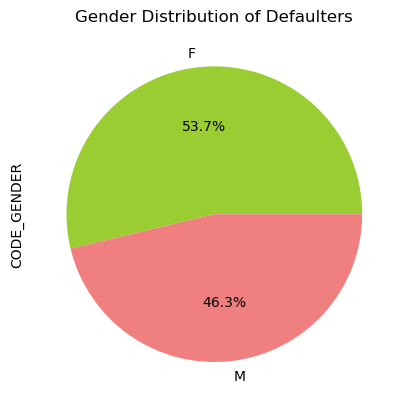

In [37]:
# Display a pie chart of the gender distribution for defaulters
colours = ['yellowgreen', 'lightcoral']
pie_gender_defaulters = gender_group_defaulters.plot(kind="pie", autopct='%1.1f%%', colors=colours)
plt.title("Gender Distribution of Defaulters")
# Save Figure for use later
plt.savefig("output_data\GenderDist-Defaulters")
plt.show()

# Non-Defaulters

In [39]:
# Group by gender (non-defaulters)
gender_group_normal = df_normal.groupby("CODE_GENDER")["CODE_GENDER"].count()
gender_group_normal

CODE_GENDER
F      73566
M      45443
XNA        2
Name: CODE_GENDER, dtype: int64

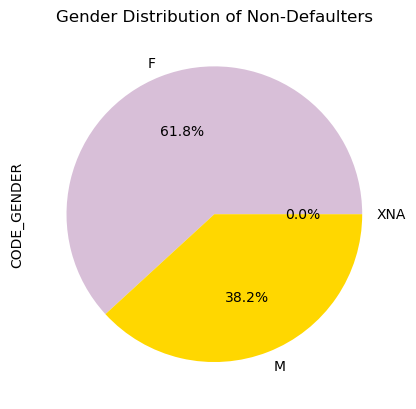

In [42]:
# Display a pie chart of the gender distribution for non-defaulters
colours = ['thistle', 'gold']
pie_gender_normal = gender_group_normal.plot(kind="pie", autopct='%1.1f%%', colors=colours)
plt.title("Gender Distribution of Non-Defaulters")
# Save Figure for use later
plt.savefig("output_data\GenderDist-NonDefaulters")
plt.show()

# Family Status

# Defaulters

In [43]:
# View the data in the family status column
df_dfaulters["NAME_FAMILY_STATUS"]

0        Single / not married
1                       Widow
2                     Married
3              Civil marriage
6                   Separated
                 ...         
24820                 Married
24821          Civil marriage
24822                 Married
24823          Civil marriage
24824                 Married
Name: NAME_FAMILY_STATUS, Length: 18530, dtype: object

In [44]:
# Group by family status (defaulters)
fam_stat_defaulters = df_dfaulters.groupby("NAME_FAMILY_STATUS")

In [45]:
# Display the count of of each category (defaulters)
fam_stat_d = fam_stat_defaulters["NAME_FAMILY_STATUS"].count().sort_values()
fam_stat_d

NAME_FAMILY_STATUS
Widow                     334
Separated                1173
Civil marriage           2330
Single / not married     3451
Married                 11242
Name: NAME_FAMILY_STATUS, dtype: int64

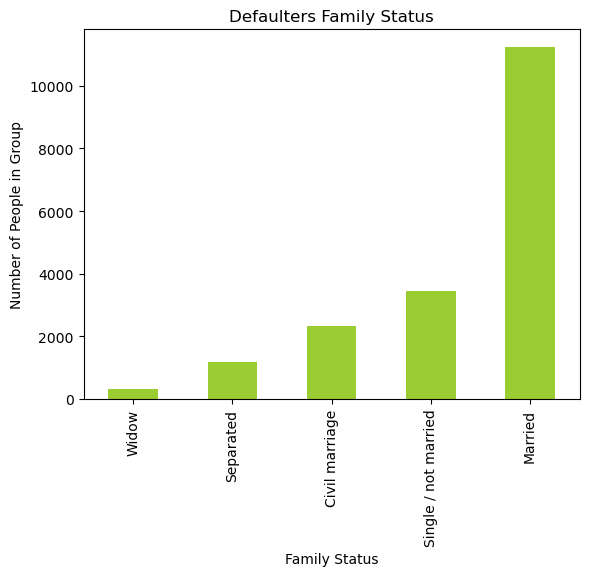

In [46]:
# Create bar graph of the family status for defualters
bar_fam_stat_d = fam_stat_d.plot(kind="bar", color="yellowgreen")
bar_fam_stat_d.set_title("Defaulters Family Status")
bar_fam_stat_d.set_xlabel("Family Status")
bar_fam_stat_d.set_ylabel("Number of People in Group")
# Save Figure for use later
plt.savefig("output_data\FamilyStatus-Defaulters")
plt.show()

# Non-Defaulters

In [48]:
# View the data in the family status column (non-defaulters)
df_normal["NAME_FAMILY_STATUS"]

24825                  Married
24826     Single / not married
24827           Civil marriage
24828     Single / not married
24829                  Married
                  ...         
199993                 Married
199994    Single / not married
199995                 Married
199996                 Married
199997                 Married
Name: NAME_FAMILY_STATUS, Length: 119011, dtype: object

In [49]:
# Group by family status (non-defaulters)
fam_stat_normal = df_normal.groupby("NAME_FAMILY_STATUS")

In [50]:
# Display the count of of each category (non-defaulters)
fam_stat_n = fam_stat_normal["NAME_FAMILY_STATUS"].count().sort_values()
fam_stat_n

NAME_FAMILY_STATUS
Widow                    3149
Separated                7522
Civil marriage          12149
Single / not married    17784
Married                 78407
Name: NAME_FAMILY_STATUS, dtype: int64

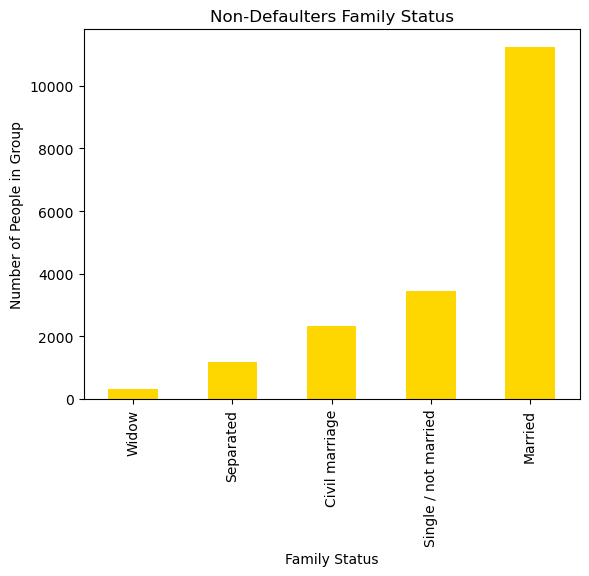

In [51]:
# Create bar graph of the family status for defualters
bar_fam_stat_n = fam_stat_d.plot(kind="bar", color="gold")
bar_fam_stat_n.set_title("Non-Defaulters Family Status")
bar_fam_stat_n.set_xlabel("Family Status")
bar_fam_stat_n.set_ylabel("Number of People in Group")
# Save Figure for use later
plt.savefig("output_data\FamilyStatus-NonDefaulters")
plt.show()

In [ ]:
# API Experimenting
# https://towardsdatascience.com/how-to-collect-data-from-statistics-canada-using-python-db8a81ce6475

In [6]:
stats_can_df = stats_can.sc.vectors_to_df('v41552791', periods = 6)
stats_can_df.head()

,v41552791
refPer,
2023-02-01,1418846.0
2023-03-01,1429998.0
2023-04-01,1439269.0
2023-05-01,1435064.0
2023-06-01,1441462.0
